# Training Machines To Tell Genders
* Task 2 of Recruitment of Postman API and Coding Innovation Lab

What if we were given a task to identify whether a particular individual is either male or female based on their drinking and smoking habbits, and some medical records as well, can we do that? Yes. With various machine learning algorithms these days it is possible to tell whether an individual is either male or female using these very algorithms.

The purpose of the ipynb is to test various algorithms' accuracy and resource usage to find which algorithm will be the best to use in real world case scenarios.

## Basic Step
First we will import various frameworks that will help us in our journey of finding the best algorithm out there.

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Seeing The Data
Now we will see what data we have in hand. What is the size of data, i.e., rows and columns of the data. Also, we will checkout the head of the data to get an overview of the data.

In [32]:
df = pd.read_csv("smoking_driking_dataset_Ver01.csv")
df.shape

(991346, 24)

In [33]:
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.00,1.00,1.00,1,1,120,...,126,92,17.10,1,1.00,21,35,40,1,Y
1,Male,30,180,80,89.00,0.90,1.20,1,1,130,...,148,121,15.80,1,0.90,20,36,27,3,N
2,Male,40,165,75,91.00,1.20,1.50,1,1,120,...,74,104,15.80,1,0.90,47,32,68,1,N
3,Male,50,175,80,91.00,1.50,1.20,1,1,145,...,104,106,17.60,1,1.10,29,34,18,1,N
4,Male,50,165,60,80.00,1.00,1.20,1,1,138,...,117,104,13.80,1,0.80,19,12,25,1,N


## Looking For Null Values
Now we will check if we have any null values in the data using the given. If the everything is zero then we don't have to modify anything.

In [34]:
df.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

## Modifing The Data
Since we have to modify the data. For Gender coulumn we can replace Male with 1 and Female with 0. At the same time we can replace Y with 1 and N with 0 for drinking column. 

In [35]:
df["sex"].replace({'Male': 1, 'Female': 0}, inplace=True)
df["DRK_YN"].replace({'Y': 1, 'N': 0}, inplace=True)

## Checking Correlations and Inserting New Columns
Now we will check correlations between different columns. 
Below we will check correlation between systolic blood pressure (SBP) and diastolic blood pressure (DBP). And we will plot a histagram for it.

<AxesSubplot:xlabel='SBP', ylabel='DBP'>

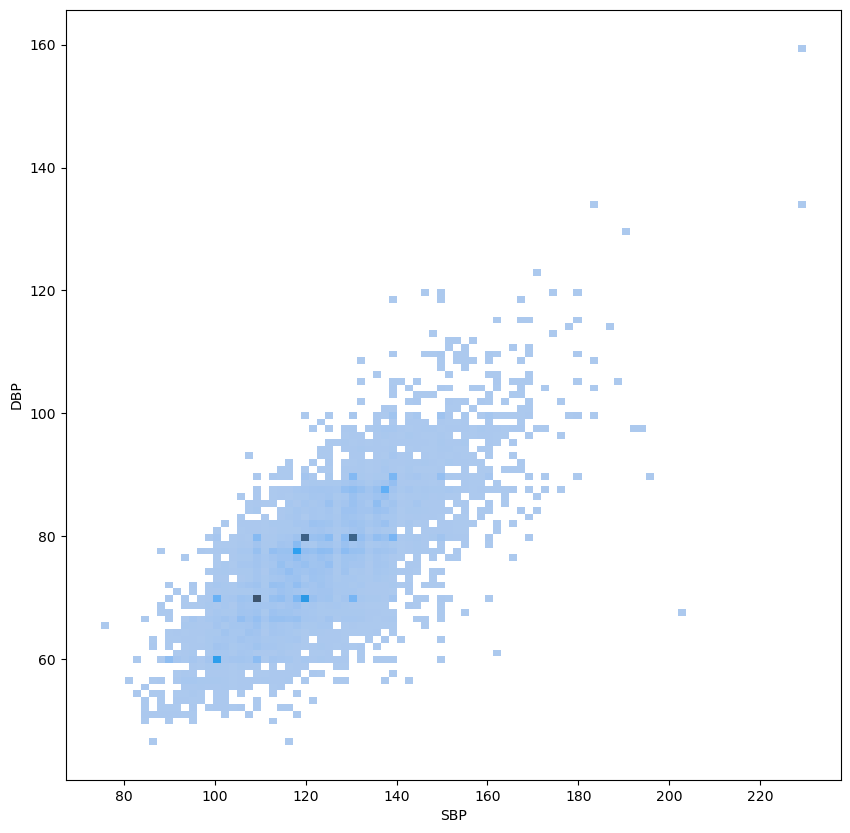

In [36]:
plt.figure(figsize=(10, 10))
sns.histplot(data = df.loc[:10000, ['SBP', 'DBP']], x ='SBP', y='DBP')

Since we can see that there is a relation between SBP and DBP. Through searching online we can find this important relation that can be used to create new column:
    ***mean arterial pressure (MAP) = 2/3 * diastolic blood pressure (DBP) + 1/3 * systolic blood pressure (SBP).***
This relation can now be used to create a new field.

In [37]:
df['MAP_status'] = df.apply(lambda row: 3 if (row['SBP'] + 2 * row['DBP']) / 3 > 100 else 1 if 60 <= (row['SBP'] + 2 * row['DBP']) / 3 <= 100 else 2 if (row['SBP'] + 2 * row['DBP']) / 3 < 60 else 0, axis=1)


Similarly, we can also see a relationship between height and weight. We can plot a line graph to confirm it.

<AxesSubplot:xlabel='height', ylabel='weight'>

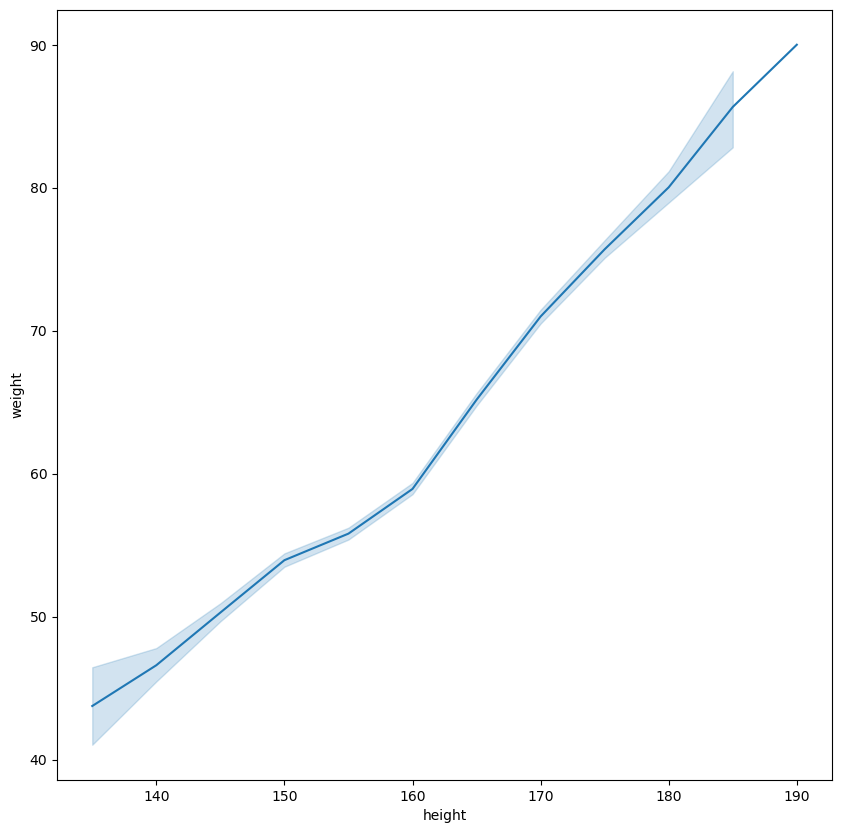

In [38]:
plt.figure(figsize=(10, 10))
sns.lineplot(data = df.loc[:10000, ['height', 'weight']], x ='height', y='weight')

We can also create a new column called body mass index (BMI) with the help of the following relation.
        ***body mass index (BMI) = weight (in KG) / height (in M) ^ 2.*** Now we can try checking the new table as well.

In [39]:
df['BMI'] = df['weight']/(df['height']/100)**2
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,MAP_status,BMI
0,1,35,170,75,90.00,1.00,1.00,1,1,120,...,17.10,1,1.00,21,35,40,1,1,1,25.95
1,1,30,180,80,89.00,0.90,1.20,1,1,130,...,15.80,1,0.90,20,36,27,3,0,1,24.69
2,1,40,165,75,91.00,1.20,1.50,1,1,120,...,15.80,1,0.90,47,32,68,1,0,1,27.55
3,1,50,175,80,91.00,1.50,1.20,1,1,145,...,17.60,1,1.10,29,34,18,1,0,3,26.12
4,1,50,165,60,80.00,1.00,1.20,1,1,138,...,13.80,1,0.80,19,12,25,1,0,3,22.04


## Using Heatmaps
Heatmap is a wonderful tool. It helps us determine the correlations between various columns.

<AxesSubplot:>

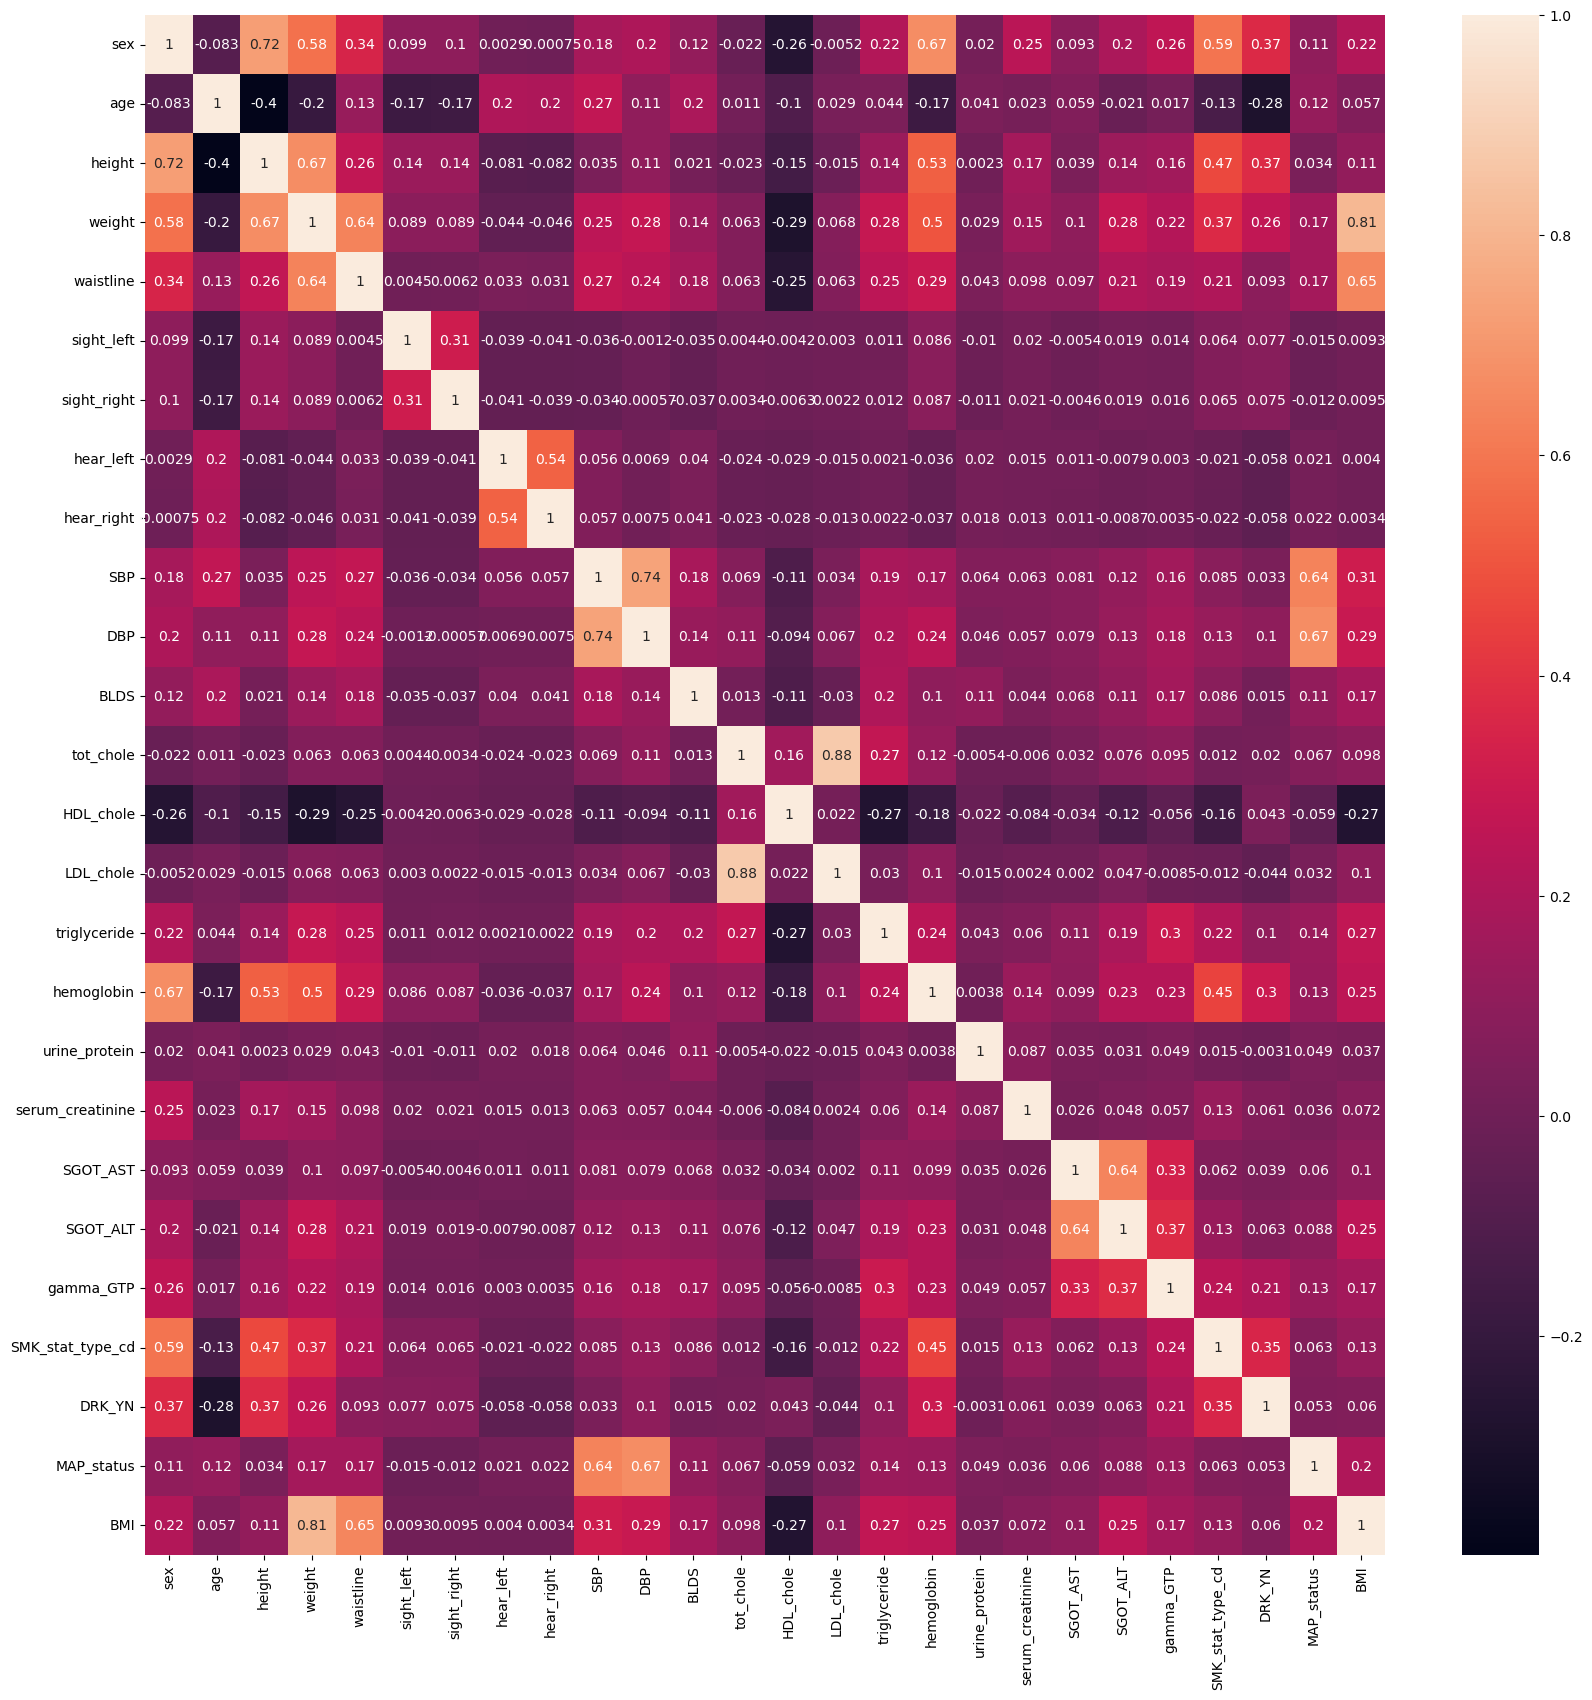

In [40]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True)

From the above heatmap, we can select vectors that have correlation coefficient greater than 0.2 with the our target vector. Those vectors are listed below. I'm using only first 10,000 columns to train and test the machiene but we can all of the data if we have a GPU centered towards machience learning.   

In [41]:
x = df.loc[:10000, ['SMK_stat_type_cd','height', 'weight', 'waistline', 'HDL_chole', 'triglyceride', 'hemoglobin', 'serum_creatinine', 'gamma_GTP', 'DRK_YN']]
y = df.loc[:10000, ['sex']]

In [42]:
x.head()

,SMK_stat_type_cd,height,weight,waistline,HDL_chole,triglyceride,hemoglobin,serum_creatinine,gamma_GTP,DRK_YN
0,1,170,75,90.00,48,92,17.10,1.00,40,1
1,3,180,80,89.00,55,121,15.80,0.90,27,0
2,1,165,75,91.00,41,104,15.80,0.90,68,0
3,1,175,80,91.00,76,106,17.60,1.10,18,0
4,1,165,60,80.00,61,104,13.80,0.80,25,0


In [44]:
y.head()

,sex
0,1
1,1
2,1
3,1
4,1


## Spliting Test Data and Train Data
Now we will split the data for both testing and training. We will 99% of the first 10,000 rows for training, i.e., 9,900 and rest 1% for testing, i.e., 100.

In [45]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.99)

## Using Different Frameworks and Packages to Check Memory, Runtime, and Accuracy
We will use some of the built-in modules of scikit-learn to check the accuracy and in-built python to check runtime and external library to check memory usage.

In [46]:
from sklearn.metrics import accuracy_score, f1_score
try: 
    from memory_profiler import memory_usage
except:
    %pip install memory_profiler
    from memory_profiler import memory_usage
import time

We are going to create a CSV like list to store the data of all of the algorithms we used to train and test. 

In [47]:
results_csv = list()

## Checking Various Algorithms
Now we will check various algorithms and determine the best one.
### GaussianNB

In [48]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
mem = memory_usage((gnb.fit, (xtrain, ytrain)), max_usage = True)
start_time = time.time()
ypred = gnb.predict(xtest)
end_time = time.time()
accuracy = accuracy_score(ytest, ypred)
score = f1_score(ytest, ypred, average = 'weighted')

results_csv.append(['GaussianNB', accuracy*100, score, (end_time - start_time)*1000, mem])

### KNeighborsClassifier

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
mem = memory_usage((knn.fit, (xtrain, ytrain)), max_usage = True)
start_time = time.time()
ypred = knn.predict(xtest)
end_time = time.time()
accuracy = accuracy_score(ytest, ypred)
score = f1_score(ytest, ypred, average = 'weighted')

results_csv.append(['KNeighbors Classifier', accuracy*100, score, (end_time - start_time)*1000, mem])

### SVC

In [50]:
from sklearn.svm import SVC
svc = SVC()
mem = memory_usage((svc.fit, (xtrain, ytrain)), max_usage = True)
start_time = time.time()
ypred = svc.predict(xtest)
end_time = time.time()
accuracy = accuracy_score(ytest, ypred)
score = f1_score(ytest, ypred, average = 'weighted')

results_csv.append(['SVC', accuracy*100, score, (end_time - start_time)*1000, mem])

### Random Forest Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100, max_depth = 5, min_samples_split = 5)
mem = memory_usage((rfc.fit, (xtrain, ytrain)), max_usage = True)
start_time = time.time()
ypred = rfc.predict(xtest)
end_time = time.time()
accuracy = accuracy_score(ytest, ypred)
score = f1_score(ytest, ypred, average = 'weighted')

results_csv.append(['Random Forest Classifier', accuracy*100, score, (end_time - start_time)*1000, mem])

### Decision Tree Classifier

In [52]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(min_samples_split = 5)
mem = memory_usage((dtc.fit, (xtrain, ytrain)), max_usage = True)
start_time = time.time()
ypred = dtc.predict(xtest)
end_time = time.time()
accuracy = accuracy_score(ytest, ypred)
score = f1_score(ytest, ypred, average = 'weighted')

results_csv.append(['Decision Tree Classifier', accuracy*100, score, (end_time - start_time)*1000, mem])

### Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000, random_state=0)
mem = memory_usage((lr.fit, (xtrain, ytrain)), max_usage = True)
start_time = time.time()
ypred = lr.predict(xtest)
end_time = time.time()
accuracy = accuracy_score(ytest, ypred)
score = f1_score(ytest, ypred, average = 'weighted')

results_csv.append(['Logistic Regression', accuracy*100, score, (end_time - start_time)*1000, mem])

### MLP Classifier

In [54]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier()
mem = memory_usage((nn.fit, (xtrain, ytrain)), max_usage = True)
start_time = time.time()
ypred = nn.predict(xtest)
end_time = time.time()
accuracy = accuracy_score(ytest, ypred)
score = f1_score(ytest, ypred, average = 'weighted')

results_csv.append(['MLP Classifier', accuracy*100, score, (end_time - start_time)*1000, mem])

### Ada Boost Classifier

In [55]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators = 100, random_state = 0)
mem = memory_usage((abc.fit, (xtrain, ytrain)), max_usage = True)
start_time = time.time()
ypred = abc.predict(xtest)
end_time = time.time()
accuracy = accuracy_score(ytest, ypred)
score = f1_score(ytest, ypred, average = 'weighted')

results_csv.append(['Ada Boost Classifier', accuracy*100, score, (end_time - start_time)*1000, mem])

### Quadratic Discriminant Analysis

In [56]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qdc = QuadraticDiscriminantAnalysis()
mem = memory_usage((qdc.fit, (xtrain, ytrain)), max_usage = True)
start_time = time.time()
ypred = qdc.predict(xtest)
end_time = time.time()
accuracy = accuracy_score(ytest, ypred)
score = f1_score(ytest, ypred, average = 'weighted')

results_csv.append(['Quadratic Discriminant Analysis', accuracy*100, score, (end_time - start_time)*1000, mem])

### Gradient Boosting Classifier

In [57]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
mem = memory_usage((gbc.fit, (xtrain, ytrain)), max_usage = True)
start_time = time.time()
ypred = gbc.predict(xtest)
end_time = time.time()
accuracy = accuracy_score(ytest, ypred)
score = f1_score(ytest, ypred, average = 'weighted')

results_csv.append(['Gradient Boosting Classifier', accuracy*100, score, (end_time - start_time)*1000, mem])

## Checking The Result
We will create a table to check the result of the algoritms above using pandas and then we shall also plot a graph for better understanding.

In [58]:
results_df = pd.DataFrame(results_csv, columns=['Model Name',  'Accuracy (%)', 'F1 Score', 'Time (ms)', 'Memory Usage (MiB)'])
results_df

,Model Name,Accuracy (%),F1 Score,Time (ms),Memory Usage (MiB)
0,GaussianNB,97.03,0.97,2.61,982.47
1,KNeighbors Classifier,89.11,0.89,14.48,982.54
2,SVC,92.08,0.92,58.21,1109.00
3,Random Forest Classifier,98.02,0.98,19.55,972.04
4,Decision Tree Classifier,95.05,0.95,1.85,972.09
5,Logistic Regression,90.10,0.90,2.13,615.94
6,MLP Classifier,91.09,0.91,2.73,616.69
7,Ada Boost Classifier,97.03,0.97,28.52,616.85
8,Quadratic Discriminant Analysis,98.02,0.98,3.00,620.34
9,Gradient Boosting Classifier,99.01,0.99,2.66,622.30


<AxesSubplot:xlabel='Accuracy (%)', ylabel='Memory Usage (MiB)'>

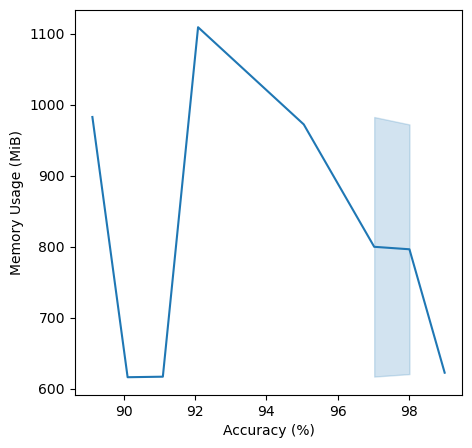

In [59]:
plt.figure(figsize=(5, 5))
sns.lineplot(data = results_df.loc[:, ['Accuracy (%)', 'Memory Usage (MiB)']], x ='Accuracy (%)', y='Memory Usage (MiB)')

<AxesSubplot:xlabel='Accuracy (%)', ylabel='Time (ms)'>

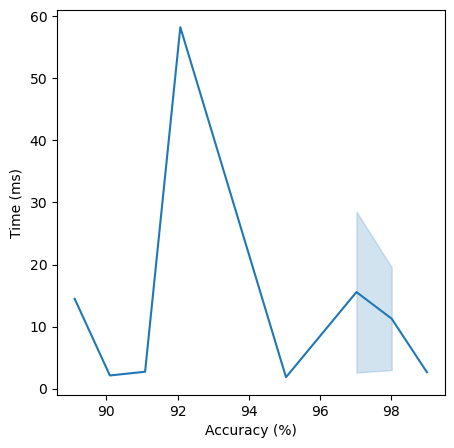

In [60]:
plt.figure(figsize=(5, 5))
sns.lineplot(data = results_df.loc[:, ['Accuracy (%)', 'Time (ms)']], x ='Accuracy (%)', y='Time (ms)')

From the above graph and table we can see a positive correlation between accuracy and memory usage. However, we don't see a correlation between accuracy and time. The best algoritm that we have used to far is Gradient Boosting Classifier, which has a low runtime and is the most accurate as well, as well as consumes nearly the same amount of memory as the other algorithms.

## Other Ways Of Doing The Same Job
We have various libraries in Python that do the same job for us as we did earlier. For this one we will use a public library called LazyPredict that will help us to predict which algorithm is the best of all. However, this library fails to tell us the memory usage.

In [61]:
try:
    from lazypredict.Supervised import LazyClassifier
except: 
    %pip install lazypredict
    from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose = 0, ignore_warnings = True, custom_metric = None)
models, predictions = clf.fit(xtrain, xtest, ytrain, ytest)
models

 97%|███████████████████████████████████████████████████████████████████████████████▏  | 28/29 [00:24<00:00,  1.48it/s]

[LightGBM] [Info] Number of positive: 5298, number of negative: 4602
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1016
[LightGBM] [Info] Number of data points in the train set: 9900, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.535152 -> initscore=0.140838
[LightGBM] [Info] Start training from score 0.140838


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:25<00:00,  1.16it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SGDClassifier,0.99,0.99,0.99,0.99,0.05
RandomForestClassifier,0.99,0.99,0.99,0.99,1.38
NuSVC,0.98,0.98,0.98,0.98,7.44
LGBMClassifier,0.98,0.98,0.98,0.98,0.22
XGBClassifier,0.98,0.98,0.98,0.98,0.20
SVC,0.98,0.98,0.98,0.98,1.08
ExtraTreesClassifier,0.98,0.98,0.98,0.98,0.89
QuadraticDiscriminantAnalysis,0.98,0.98,0.98,0.98,0.04
LabelPropagation,0.98,0.98,0.98,0.98,4.12


From the above we reach to same conclusion that Gradient Boosting Classifier is one of the best algorithm for the job.